# Telco Customer Churn Prediction - Model Training

In this notebook, we will train our first classification model using Logistic Regression.
We will evaluate its performance using accuracy, precision, recall, and F1-score on both training and test data.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [13]:
df_encoded = pd.read_csv("../data/preprocessed_telco.csv")
y = df_encoded['Churn']
X = df_encoded.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_train_pred = logreg.predict(X_train)

y_test_pred = logreg.predict(X_test)

In [19]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8833777777777778
Test Accuracy: 0.8024164889836531

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



## Confusion Matrix


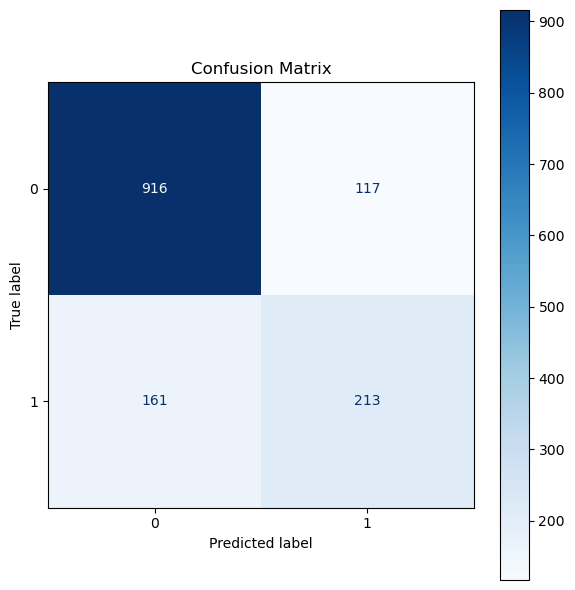

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')


plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("../images/confusion_matrix.png", dpi=300)

plt.show()

## ROC Curve and AUC Score


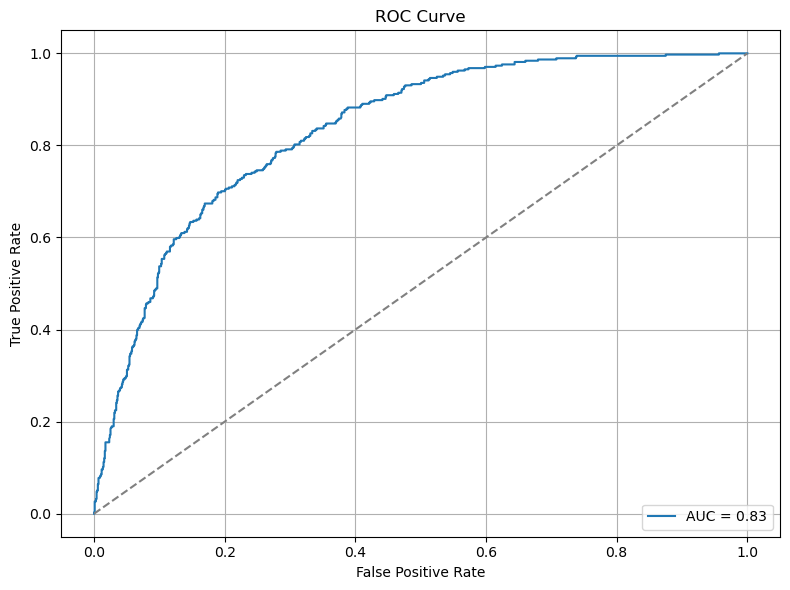

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

auc_score = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/roc_curve.png", dpi=300)
plt.show()

## Logistic Regression with Class Weight Balanced


In [36]:
logreg_balanced = LogisticRegression(max_iter = 1000, random_state=42, class_weight="balanced")

logreg_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [38]:
y_train_pred_bal = logreg_balanced.predict(X_train)
y_test_pred_bal = logreg_balanced.predict(X_test)

In [40]:
print("Balanced Model - Training Accuracy:", accuracy_score(y_train, y_train_pred_bal))
print("Balanced Model - Test Accuracy:", accuracy_score(y_test, y_test_pred_bal))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_bal))

Balanced Model - Training Accuracy: 0.8490666666666666
Balanced Model - Test Accuracy: 0.7476901208244492

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



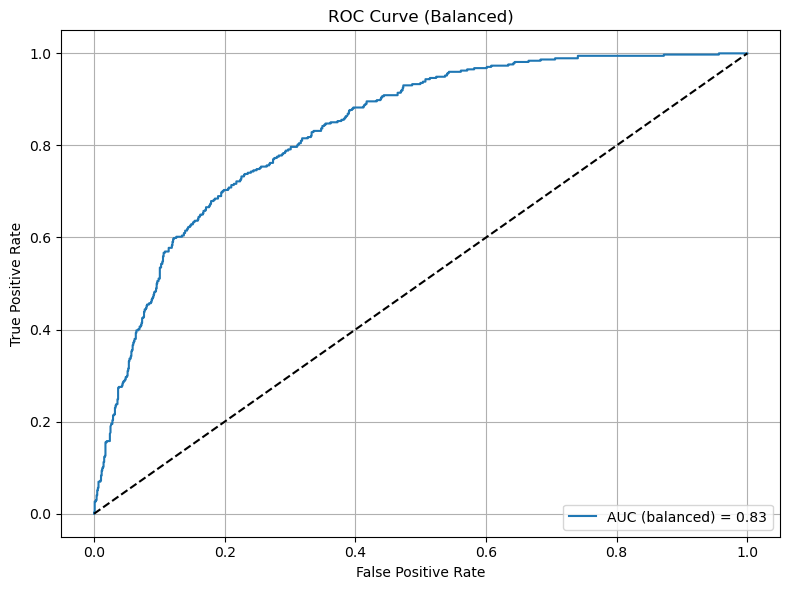

In [42]:
y_scores_bal = logreg_balanced.predict_proba(X_test)[:, 1]
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_scores_bal)
auc_bal = roc_auc_score(y_test, y_scores_bal)

plt.figure(figsize=(8,6))
plt.plot(fpr_bal, tpr_bal, label=f"AUC (balanced) = {auc_bal:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Balanced)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/roc_curve_balanced.png", dpi=300)
plt.show()

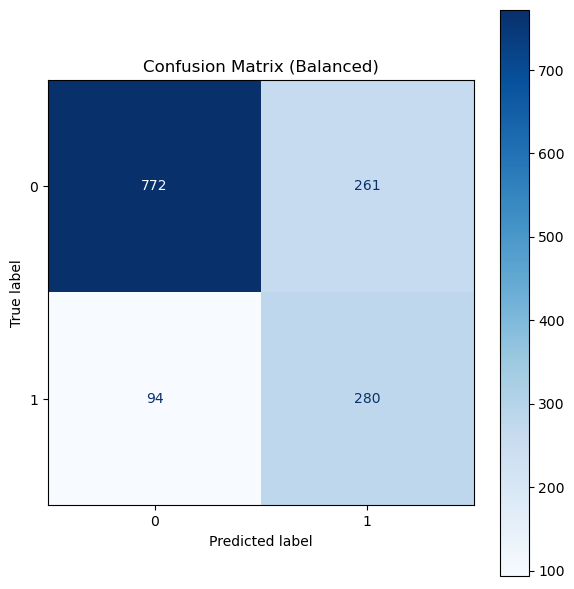

In [44]:
cm_bal = confusion_matrix(y_test, y_test_pred_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=logreg_balanced.classes_)

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix (Balanced)")
plt.tight_layout()
plt.savefig("../images/confusion_matrix_balanced.png", dpi=300)
plt.show()

## Save the Final Model (Balanced Logistic Regression)


In [49]:
import joblib

joblib.dump(logreg_balanced, "../models/logistic_regression_balanced.joblib")

['../models/logistic_regression_balanced.joblib']